In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train=pd.read_csv('/Users/shaily/Desktop/Kaggle-WSDM/train.csv')
songs=pd.read_csv('/Users/shaily/Desktop/Kaggle-WSDM/songs.csv')
songs_extra_info=pd.read_csv('/Users/shaily/Desktop/Kaggle-WSDM/song_extra_info.csv')
members=pd.read_csv('/Users/shaily/Desktop/Kaggle-WSDM/members.csv')
test=pd.read_csv('/Users/shaily/Desktop/Kaggle-WSDM/test.csv')

Understanding the data

In [3]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [4]:
print(members['registered_via'].describe())
members['registered_via'].unique()

count    34403.000000
mean         5.953376
std          2.287534
min          3.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         16.000000
Name: registered_via, dtype: float64


array([ 7,  4,  9,  3, 13, 16])

In [5]:
print(members['expiration_date'].describe())
members['expiration_date'].unique()

count    3.440300e+04
mean     2.016901e+07
std      7.320925e+03
min      1.970010e+07
25%      2.017020e+07
50%      2.017091e+07
75%      2.017093e+07
max      2.020102e+07
Name: expiration_date, dtype: float64


array([20170920, 20170622, 20170712, ..., 20130324, 20140703, 20181228])

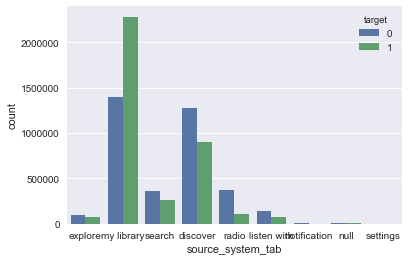

In [6]:
sns.countplot(train['source_system_tab'],hue=train['target'])

In [7]:
songs['genre_ids'].describe()

count     2202204
unique       1045
top           465
freq       567911
Name: genre_ids, dtype: object

In [8]:
df_train =train.merge(songs,how="left",on="song_id")

In [9]:
# get top 5 genre
genre_dict={}
for i in df_train['genre_ids']:
    r=str(i).split('|')
    for t in r:
        if t in genre_dict:
            genre_dict[t]=genre_dict[t]+1
        else:
            genre_dict[t]=1

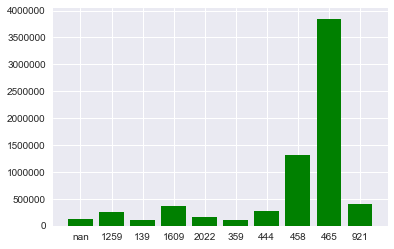

['1259', '444', '1609', '921', '458']

In [10]:
d_keys=genre_dict.keys()
d_values=genre_dict.values()

d_sorted_keys = [x for _,x in sorted(zip(d_values,d_keys))]
d_sorted_values=sorted(d_values)
l=len(d_sorted_values)
plt.bar(d_sorted_keys[l-10:l], d_sorted_values[l-10:l], color='g')
plt.show()
top_5_genre=d_sorted_keys[-6:-1]
top_5_genre

In [11]:
# Add top 5 songs as features
songs['top1']=songs['genre_ids'].str.split("|").apply(lambda x : 1 if '465' in str(x) else 0)
songs['top2']=songs['genre_ids'].str.split("|").apply(lambda x : 1 if '458' in str(x) else 0)
songs['top3']=songs['genre_ids'].str.split("|").apply(lambda x : 1 if '921' in str(x) else 0)
songs['top4']=songs['genre_ids'].str.split("|").apply(lambda x : 1 if '1609' in str(x) else 0)
songs['top5']=songs['genre_ids'].str.split("|").apply(lambda x : 1 if '444' in str(x) else 0)

In [12]:
# feature to signify if genre for a particular songs is given or not
songs['isnull']=songs['genre_ids'].str.split("|").apply(lambda x : 1 if 'nan' in str(x) else 0)

In [13]:
# Calculating new feature - number of genres of that song
songs['count_genre']=songs['genre_ids'].str.split("|").apply(lambda x : len(x) if 'nan' not in str(x) else 0)

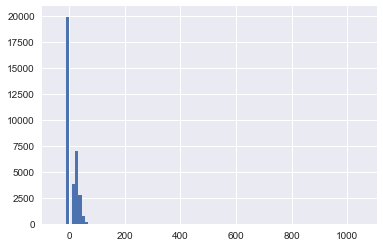

count    34403.000000
mean        12.280935
std         18.170251
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

In [14]:
plt.hist(members['bd'],bins=100)
plt.show()
members['bd'].describe()

In [15]:
# Calculate average age of users in age range 10-100 years
a=members[members['bd']<100 ]
b=a[a['bd']>=10]
mean_bd=b['bd'].mean()

In [16]:
# Add updated age of the users.
members['new_bd']=members['bd'].apply(lambda x : x if x<100 and x>=10 else mean_bd)

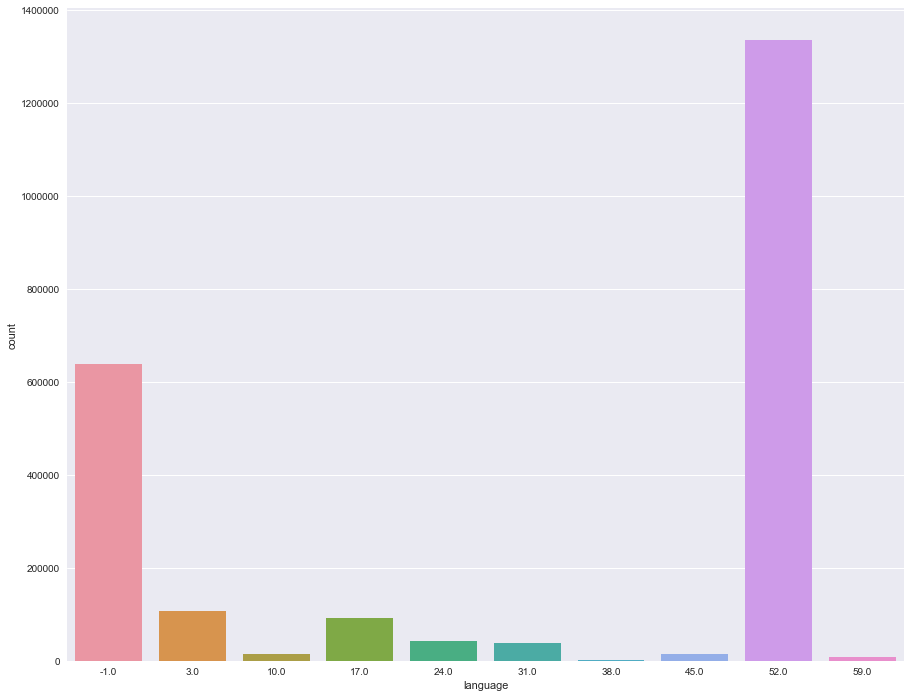

In [17]:
plt.figure(figsize=(15,12))
sns.countplot(songs['language'])

In [18]:
# replace nan with most used language in songs.
songs['language'].fillna(value=52,inplace=True)

In [19]:
# Calculate artist count for every particular song
songs['artist_count']=songs['artist_name'].str.split("|").apply(lambda x : len(x) if 'Unknown' not in (x) else 0)

In [20]:
# Calculate composer count for every particular song
songs['composer'].fillna(value='Unknown',inplace=True)
songs['composer_count']=songs['composer'].str.split("|").apply(lambda x : len(x) if 'Unknown' not in (x) else 0)

In [21]:
# Calculate lyricist count for every particular song
songs['lyricist'].fillna(value='Unknown',inplace=True)
songs['lyricist_count']=songs['lyricist'].str.split("|").apply(lambda x : len(x) if 'Unknown' not in (x) else 0)

In [22]:
# Calculate memebership duration.
members['time']=members['expiration_date']-members['registration_init_time']
members['time']=members['time'].apply(lambda x: x if x>=0 else 0)

In [23]:
# Extract song year information from ISRC data.
def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan
songs_extra_info['song_year'] = songs_extra_info['isrc'].apply(isrc_to_year)

In [24]:
songs =songs.merge(songs_extra_info,how="left",on="song_id")

In [25]:
songs_extra_info.head()

,song_id,name,isrc,song_year
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,2012.0
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,2016.0
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,2008.0
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,2013.0
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,2013.0


In [26]:
songs.drop(["name","isrc"],axis=1,inplace=True)

In [27]:
songs['song_year'].fillna(value=-1,inplace=True)

In [28]:
train['source_system_tab_category']=train['source_system_tab'].apply(lambda x: x if x!='null' else 'Unknown')

In [29]:
source_tab_dict = {"my library":8,"discover":7,"search":6,"radio":5,"listen with":4,"explore":3,"notification":2,"settings":1,"Unknown":0 }
train['source_system_tab_category']=train['source_system_tab_category'].map(source_tab_dict)

In [30]:
source_screen_name_dict={'Local playlist more':0,'Online playlist more':1,'Radio':2,'Album more':3,'Search':4,'Artist more':5,'Discover Feature':6,'Discover Chart':7,'Others profile more':8,'Discover Genre':9,'My library':10,'Explore':11,'Unknown':12,'Discover New':13,'Search Trends':14,'Search Home':15,'My library_Search':16,'Self profile more':17,'Concert':18,'Payment':19}
train['source_screen_name_category']=train['source_screen_name'].map(source_screen_name_dict)

In [31]:
train['source_system_tab_category'] = train['source_system_tab_category'].astype("category")
train['source_screen_name_category'] = train['source_screen_name_category'].astype("category")

In [32]:
source_type_dict = {"local-library":12,"online-playlist":11,"local-playlist":10,"radio":9,"album":8,"top-hits-for-artist":7,"song":6,"song-based-playlist":5,"listen-with":4,"Unknown":3,"topic-article-playlist":2,"artist":1,"my-daily-playlist":0}
train['source_type_category']=train['source_type'].map(source_type_dict)

In [33]:
train['source_type_category']=train['source_type'].map(source_type_dict)

Apply transformation on test data.

In [34]:
test['source_system_tab_category']=test['source_system_tab'].apply(lambda x: x if x!='null' else 'Unknown')
test['source_system_tab_category']=test['source_system_tab_category'].map(source_tab_dict)
test['source_screen_name_category']=test['source_screen_name'].map(source_screen_name_dict)
test['source_type_category']=test['source_type'].map(source_type_dict)
test['source_system_tab_category'] = test['source_system_tab_category'].astype("category")
test['source_screen_name_category'] = test['source_screen_name_category'].astype("category")
test['source_type_category'] = test['source_type_category'].astype("category")

In [35]:
train1=pd.DataFrame(train)
test1=pd.DataFrame(test)

In [36]:
train1.drop(['source_system_tab','source_screen_name','source_type'],axis=1,inplace=True)

In [37]:
test1.drop(['source_system_tab','source_screen_name','source_type'],axis=1,inplace=True)

In [38]:
train1 = train1.merge(songs,how="left",on="song_id")
train1.drop(['genre_ids','artist_name','composer','lyricist'],axis=1,inplace=True)
train1 = train1.merge(members,how="left",on="msno")
train1.drop(['bd','registration_init_time','expiration_date'],axis=1,inplace=True)
train1['registered_via'] = train1['registered_via'].astype("category")

gender_dict={'male':0,'female':1,'Unknown':2}
train1['gender'].fillna(value="Unknown",inplace=True)
train1['gender']=train1['gender'].map(gender_dict)
train1['gender'] = train1['gender'].astype("category")
train1['gender'].value_counts()

2    2961479
0    2297623
1    2118316
Name: gender, dtype: int64

In [39]:
test1 = test1.merge(songs,how="left",on="song_id")
test1.drop(['genre_ids','artist_name','composer','lyricist'],axis=1,inplace=True)
test1 = test1.merge(members,how="left",on="msno")
test1.drop(['bd','registration_init_time','expiration_date'],axis=1,inplace=True)
test1['registered_via'] = test1['registered_via'].astype("category")
test1['gender'].fillna(value="Unknown",inplace=True)
test1['gender']=test1['gender'].map(gender_dict)

In [40]:
test1.columns

Index(['id', 'msno', 'song_id', 'source_system_tab_category',
       'source_screen_name_category', 'source_type_category', 'song_length',
       'language', 'top1', 'top2', 'top3', 'top4', 'top5', 'isnull',
       'count_genre', 'artist_count', 'composer_count', 'lyricist_count',
       'song_year', 'city', 'gender', 'registered_via', 'new_bd', 'time'],
      dtype='object')

In [41]:
train1['gender'] = train1['gender'].astype("category")
test1['gender'] = test1['gender'].astype("category")

In [42]:
import lightgbm as lgb
X=train1.drop(['msno','song_id','target'],axis=1).values
y=train1['target'].values
d_train = lgb.Dataset(X, y)
watchlist = [d_train]

In [43]:
params = {}
params['learning_rate'] = 0.5
params['application'] = 'binary'
params['max_depth'] = 12
params['num_leaves'] = 2**6
params['verbosity'] = 0
params['metric'] = 'auc'

In [44]:
model = lgb.train(params, train_set=d_train, num_boost_round=150, valid_sets=watchlist, verbose_eval=5)

[5]	training's auc: 0.678732
[10]	training's auc: 0.685565
[15]	training's auc: 0.690365
[20]	training's auc: 0.694144
[25]	training's auc: 0.697742
[30]	training's auc: 0.700545
[35]	training's auc: 0.703582
[40]	training's auc: 0.705709
[45]	training's auc: 0.70756
[50]	training's auc: 0.709159
[55]	training's auc: 0.710684
[60]	training's auc: 0.712146
[65]	training's auc: 0.714017
[70]	training's auc: 0.715653
[75]	training's auc: 0.717352
[80]	training's auc: 0.718737
[85]	training's auc: 0.72016
[90]	training's auc: 0.721553
[95]	training's auc: 0.723122
[100]	training's auc: 0.72446
[105]	training's auc: 0.72616
[110]	training's auc: 0.727916
[115]	training's auc: 0.72891
[120]	training's auc: 0.729896
[125]	training's auc: 0.730812
[130]	training's auc: 0.732096
[135]	training's auc: 0.732737
[140]	training's auc: 0.733851
[145]	training's auc: 0.734579
[150]	training's auc: 0.735464


In [48]:
# Prediction
X_test = test1.drop(["msno","song_id","id"],axis=1).values
y_preds = model.predict(X_test)

result_df = pd.DataFrame()
result_df['id'] = test1['id'].values
result_df['target'] = y_preds
result_df.to_csv('submission_lgb.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')

Accuracy obtained = 0.65018